### Imports 

In [1]:
from budget import gen_budget_data
from monthly import gen_monthly_data
import configparser
from train import print_config,train_agent
from lightning_gym.utils import random_seed
import warnings
warnings.filterwarnings("ignore")


C:\lightning-gym\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Using backend: pytorch


### Train Agent

training
	episodes = 100
	verbose = False
env
	budget = 10
	node_id = 
	repeat = False
	cutoff = 20
	graph_type = scale_free
	n = 128
	seed = 5785
agent
	load_model = False
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	learning_rate = 1e-2
	layers = 2


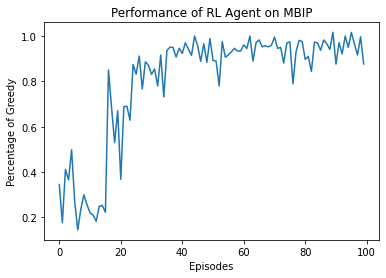

In [3]:
config = configparser.ConfigParser()
config_loc = "./configs/train_scale_free.conf"
config.read(config_loc)
# config["training"]["verbose"] = "True"
print_config(config)
seed = config["env"].getint("seed", fallback=None)
if seed:
    random_seed(seed)
# train_upwards(config)
log = train_agent(config, pog=True)
# before_after()
log.plot_reward(reward_type="pog")


### Generate monthly comparison

In [2]:
config = configparser.ConfigParser()
config_loc = "./configs/test_snapshot.conf"
config.read(config_loc)
print_config(config)
seed = config["env"].getint("seed", fallback=None)
if seed:
    random_seed(seed)
gen_monthly_data(config)


training
	episodes = 0
	verbose = False
env
	budget = 20
	node_id = 
	repeat = True
	cutoff = 20
	graph_type = snapshot
	down_sample = False
	filename = 2-26-22.json
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True
training
	episodes = 0
	verbose = False
env
	budget = 20
	node_id = 
	repeat = True
	cutoff = 20
	graph_type = snapshot
	down_sample = False
	filename = snapshots/feb.json
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True


TypeError: unhashable type: 'dict'

#### Generate results by budget

In [ ]:
config = configparser.ConfigParser()
config_loc = "configs/test_scale_free.conf"
config.read(config_loc)
config["env"]["repeat"] = "True"
# config["training"]["verbose"] = "True"
seed = config["env"].getint("seed", fallback=None)
print_config(config)
if seed:
    random_seed(seed)
    print("seed set")
gen_budget_data(config)